In [1]:
import pandas as pd
import numpy as np
import os, random, math
from matplotlib import pyplot
from openalea.vmango.simulation.fruitmodel.fruit_model_main import growth_main
from openalea.vmango.simulation.fruitmodel.fruitmodel import initialize_input
from openalea.vmango.simulation.fruitmodel.fruitmodel_error import FruitModelValueError

In [2]:
path_hourly = '../../share/environment/weather_hourly_stpierre_2002.csv'
path_daily = '../../share/environment/weather_daily_stpierre_2002.csv'
path_sunlit = '../../share/environment/sunlit_fractions.csv'

In [3]:
df_hourly, df_daily, df_sunlit = initialize_input(path_hourly, path_daily, path_sunlit)

Input data has days with less than 24 h


In [4]:
bloom_date = '01/11/2002'
nb_fruits = 1
nb_leaves_treatments = [5, 10, 25, 50, 100, 150]

DM_fruit_0 = 0.97 * np.random.normal(13.9, 4.1) + 0.03 * np.random.normal(29.2, 0.66)
sunlit_bs = df_sunlit.iloc[:,random.randrange(0, 5)].to_numpy() 

In [5]:
dfs = []
for i, nb_leaves in enumerate(nb_leaves_treatments):
    df = None
    try:
        df = growth_main(bloom_date, nb_fruits, nb_leaves, DM_fruit_0, sunlit_bs, df_hourly, df_daily, verbose=False)
    except FruitModelValueError as e:
        print(i, nb_leaves, e)
    finally:
        dfs.append(df)
        if df is not None:
            display(df.head())


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,104.053423,10.987362,83.086470,0.119910,2.615529,-0.423043,0.350307,0.773350,8.792040,0.158334,2.693720,0.003376,0.016388,0.019285,359.1,5.0,0.326157,68
1,2002-11-09,110.266193,11.107548,89.343125,0.117967,2.572635,-0.462112,0.318449,0.780561,8.481409,0.160773,3.481390,0.003563,0.016730,0.019394,366.4,5.0,0.326157,69
2,2002-11-10,109.155876,11.234531,88.247262,0.116056,2.530444,-0.439419,0.348707,0.788126,8.992096,0.155749,2.946244,0.003774,0.017108,0.019502,374.5,5.0,0.326157,70
3,2002-11-11,110.424410,11.349476,89.288071,0.114176,2.488944,-0.419021,0.373340,0.792360,9.344658,0.140388,2.436128,0.003974,0.017460,0.019595,382.0,5.0,0.326157,71
4,2002-11-12,111.447472,11.426222,90.135389,0.112326,2.448126,-0.485421,0.310389,0.795810,8.554700,0.156689,3.827828,0.004172,0.017770,0.019621,389.4,5.0,0.326157,72


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,104.053423,10.987362,83.086470,0.239819,2.615529,-0.422173,0.351177,0.773350,8.756869,0.223422,2.693720,0.003376,0.016388,0.019285,359.1,10.0,0.326157,68
1,2002-11-09,110.415893,11.272067,89.373040,0.235934,2.572635,-0.464625,0.323562,0.788188,8.583054,0.235019,3.481390,0.003569,0.016906,0.019681,366.4,10.0,0.326157,69
2,2002-11-10,109.634253,11.587223,88.423153,0.232112,2.530444,-0.445953,0.358521,0.804474,9.256333,0.229098,2.946244,0.003793,0.017490,0.020114,374.5,10.0,0.326157,70
3,2002-11-11,111.252481,11.888721,89.625657,0.228352,2.488944,-0.429695,0.387545,0.817240,9.776332,0.197349,2.436128,0.004009,0.018050,0.020525,382.0,10.0,0.326157,71
4,2002-11-12,112.584172,12.111587,90.624024,0.224652,2.448126,-0.498966,0.328406,0.827372,9.102499,0.228607,3.827828,0.004227,0.018530,0.020797,389.4,10.0,0.326157,72


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,104.053423,10.987362,83.086470,0.599548,2.615529,-0.421376,0.351974,0.773350,8.724622,0.283096,2.693720,0.003376,0.016388,0.019285,359.1,25.0,0.326157,68
1,2002-11-09,110.553143,11.422646,89.400468,0.589835,2.572635,-0.466842,0.328306,0.795148,8.672721,0.308521,3.481390,0.003574,0.017066,0.019944,366.4,25.0,0.326157,69
2,2002-11-10,110.084432,11.923334,88.586323,0.580280,2.530444,-0.451768,0.368191,0.819958,9.491477,0.326563,2.946244,0.003805,0.017846,0.020697,374.5,25.0,0.326157,70
3,2002-11-11,112.102989,12.470671,89.958265,0.570879,2.488944,-0.440859,0.402965,0.843824,10.227837,0.276245,2.436128,0.004032,0.018665,0.021531,382.0,25.0,0.326157,71
4,2002-11-12,113.845334,12.893513,91.154424,0.561631,2.448126,-0.514088,0.348829,0.862918,9.714064,0.319580,3.827828,0.004263,0.019359,0.022141,389.4,25.0,0.326157,72


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,104.053423,10.987362,83.086470,1.199096,2.615529,-0.421108,0.352242,0.773350,8.713811,0.303102,2.693720,0.003376,0.016388,0.019285,359.1,50.0,0.326157,68
1,2002-11-09,110.599155,11.473071,89.409663,1.179671,2.572635,-0.467527,0.329949,0.797475,8.700389,0.337356,3.481390,0.003576,0.017119,0.020032,366.4,50.0,0.326157,69
2,2002-11-10,110.244802,12.046339,88.642825,1.160560,2.530444,-0.453840,0.371762,0.825601,9.575278,0.365601,2.946244,0.003808,0.017975,0.020911,374.5,50.0,0.326157,70
3,2002-11-11,112.421504,12.691709,90.081105,1.141759,2.488944,-0.444934,0.408915,0.853849,10.392639,0.316114,2.436128,0.004036,0.018892,0.021913,382.0,50.0,0.326157,71
4,2002-11-12,114.345608,13.214806,91.359096,1.123262,2.448126,-0.520212,0.357170,0.877381,9.961717,0.358807,3.827828,0.004270,0.019688,0.022695,389.4,50.0,0.326157,72


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,104.053423,10.987362,83.086470,2.398192,2.615529,-0.421297,0.352053,0.773350,8.721446,0.288973,2.693720,0.003376,0.016388,0.019285,359.1,100.0,0.326157,68
1,2002-11-09,110.566659,11.437462,89.403169,2.359341,2.572635,-0.466869,0.328963,0.795832,8.673786,0.330074,3.481390,0.003575,0.017082,0.019970,366.4,100.0,0.326157,69
2,2002-11-10,110.161641,11.992349,88.608940,2.321120,2.530444,-0.452733,0.370393,0.823126,9.530534,0.363252,2.946244,0.003807,0.017918,0.020817,374.5,100.0,0.326157,70
3,2002-11-11,112.315739,12.631730,90.034012,2.283518,2.488944,-0.443631,0.407502,0.851132,10.339939,0.320199,2.436128,0.004035,0.018831,0.021810,382.0,100.0,0.326157,71
4,2002-11-12,114.244220,13.164887,91.310481,2.246525,2.448126,-0.519207,0.355933,0.875139,9.921080,0.356895,3.827828,0.004269,0.019638,0.022609,389.4,100.0,0.326157,72


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,104.053423,10.987362,83.086470,3.597288,2.615529,-0.421711,0.351640,0.773350,8.738167,0.258030,2.693720,0.003376,0.016388,0.019285,359.1,150.0,0.326157,68
1,2002-11-09,110.495490,11.359424,89.388947,3.539012,2.572635,-0.465625,0.326603,0.792228,8.623485,0.299185,3.481390,0.003572,0.016999,0.019834,366.4,150.0,0.326157,69
2,2002-11-10,109.944974,11.836445,88.527750,3.481680,2.530444,-0.449863,0.366102,0.815964,9.414431,0.331760,2.946244,0.003802,0.017755,0.020546,374.5,150.0,0.326157,70
3,2002-11-11,111.953216,12.396590,89.886417,3.425277,2.488944,-0.439099,0.401356,0.840455,10.156658,0.292086,2.436128,0.004030,0.018588,0.021403,382.0,150.0,0.326157,71
4,2002-11-12,113.744648,12.858856,91.099087,3.369787,2.448126,-0.513310,0.348042,0.861352,9.682596,0.323979,3.827828,0.004262,0.019324,0.022082,389.4,150.0,0.326157,72


### Lechaudel 2007, p. 226, fruit fresh matter vs days after bloom

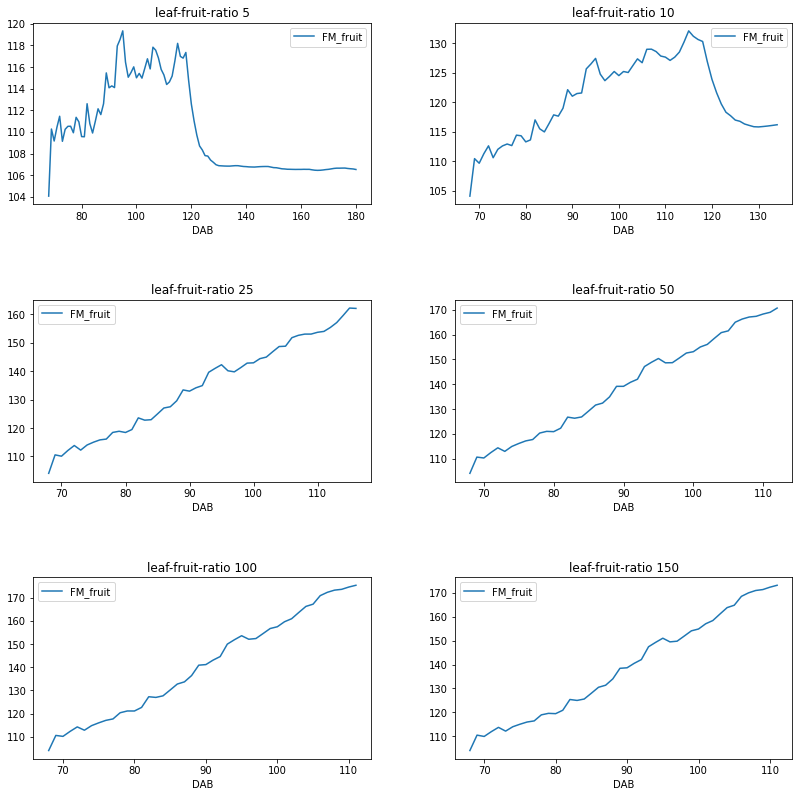

In [6]:
fig_1, axs_1 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_1 = axs_1.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'FM_fruit']].plot(
            x=0, y=1, title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_1[i], figsize=(12,12))

### Lechaudel 2005, p. 589, stem and leaf reserves vs days after bloom

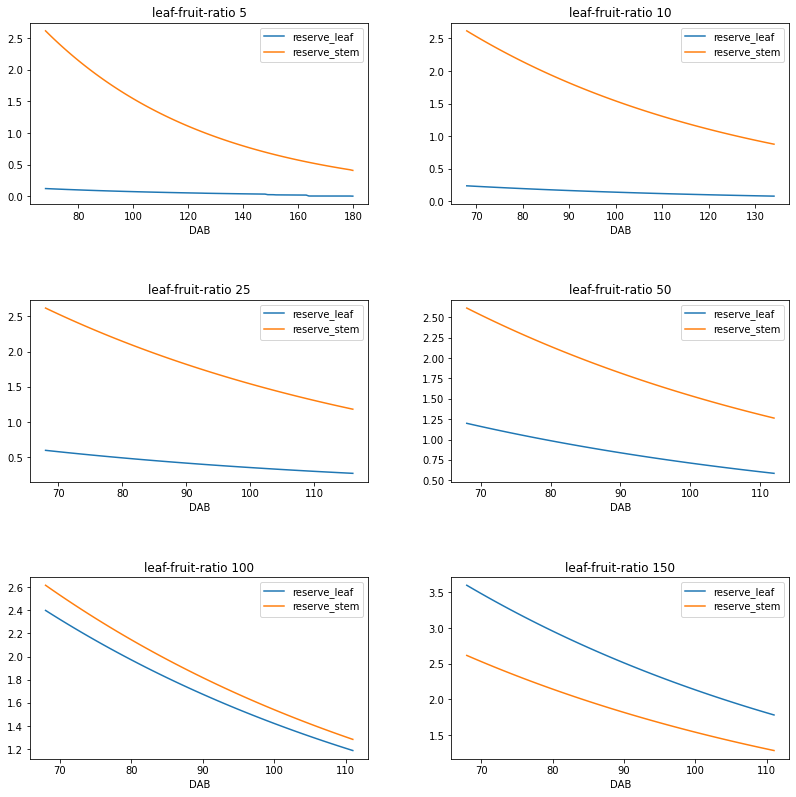

In [7]:
fig_2, axs_2 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_2 = axs_2.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'reserve_leaf', 'reserve_stem']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_2[i], figsize=(12,12))

### Lechaudel 2005, p. 590, fruit dry matter vs degree days

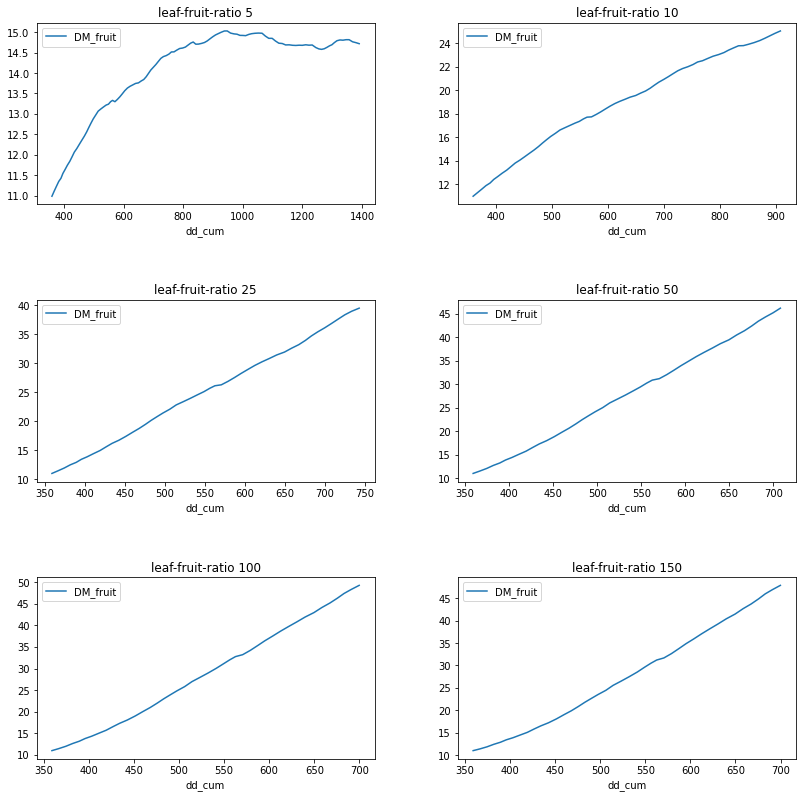

In [8]:
fig_3, axs_3 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_3 = axs_3.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['dd_cum', 'DM_fruit']].plot(
            x=0, y=1, title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_3[i], figsize=(12,12))